In [3]:
#imports

import pandas as pd
import numpy as np

In [4]:
data_loc = "/media/sree/mars/data/bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv"
data = pd.read_csv(data_loc)

In [5]:
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [6]:
## convert time stamp into yyyy-mm-dd format
## https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date-in-python

import datetime
data["year_month"] = data["Timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x))


data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year_month
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 02:52:00
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 02:53:00
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 02:54:00
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 02:55:00
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 02:56:00


In [7]:
## how has the number of transactions increased over the years?

data.groupby(['year_month']).size()

years = np.unique(data['year_month'].dt.year)
years

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [8]:
## avg value of a coin over the years
avg_open = []
avg_volume = []
avg_close = []
avg_high = []
avg_low = []
avg_BTC = []
avg_average = []

for year in years:
    avg_volume.append(data[data['year_month'].dt.year == year]['Volume_(Currency)'].mean())
    avg_BTC.append(data[data['year_month'].dt.year == year]['Volume_(BTC)'].mean())
    avg_open.append(data[data['year_month'].dt.year == year]['Open'].mean())
    avg_close.append(data[data['year_month'].dt.year == year]['Close'].mean())
    avg_high.append(data[data['year_month'].dt.year == year]['High'].mean())
    avg_low.append(data[data['year_month'].dt.year == year]['Low'].mean())
    avg_average.append(data[data['year_month'].dt.year == year]['Weighted_Price'].mean())

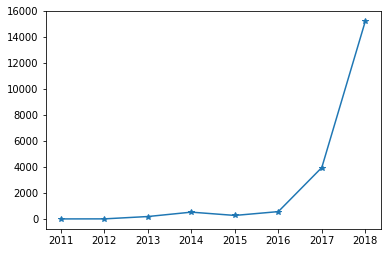

In [9]:
# mean variation of bitcoin value over the years
import matplotlib.pyplot as plt

x = years.tolist()
y = avg_high

plt.plot(x, y, '*-')
plt.show()


In [34]:
# monthly mean variation

monthly_avg_open = []
monthly_avg_volume = []
monthly_avg_close = []
monthly_avg_high = []
monthly_avg_low = []
monthly_avg_BTC = []
monthly_avg_average = []

months = list(range(1,13,1))

for year in years:
    for month in months:
        monthly_avg_volume.append(data[(data['year_month'].dt.year == year) & (data['year_month'].dt.month == month)]['Volume_(Currency)'].mean())        
        monthly_avg_BTC.append(data[(data['year_month'].dt.year == year) & (data['year_month'].dt.month == month)]['Volume_(BTC)'].mean())
        monthly_avg_open.append(data[(data['year_month'].dt.year == year) & (data['year_month'].dt.month == month)]['Open'].mean())
        monthly_avg_close.append(data[(data['year_month'].dt.year == year) & (data['year_month'].dt.month == month)]['Close'].mean())
        monthly_avg_high.append(data[(data['year_month'].dt.year == year) & (data['year_month'].dt.month == month)]['High'].mean())
        monthly_avg_low.append(data[(data['year_month'].dt.year == year) & (data['year_month'].dt.month == month)]['Low'].mean())
        monthly_avg_average.append(data[(data['year_month'].dt.year == year) & (data['year_month'].dt.month == month)]['Weighted_Price'].mean())

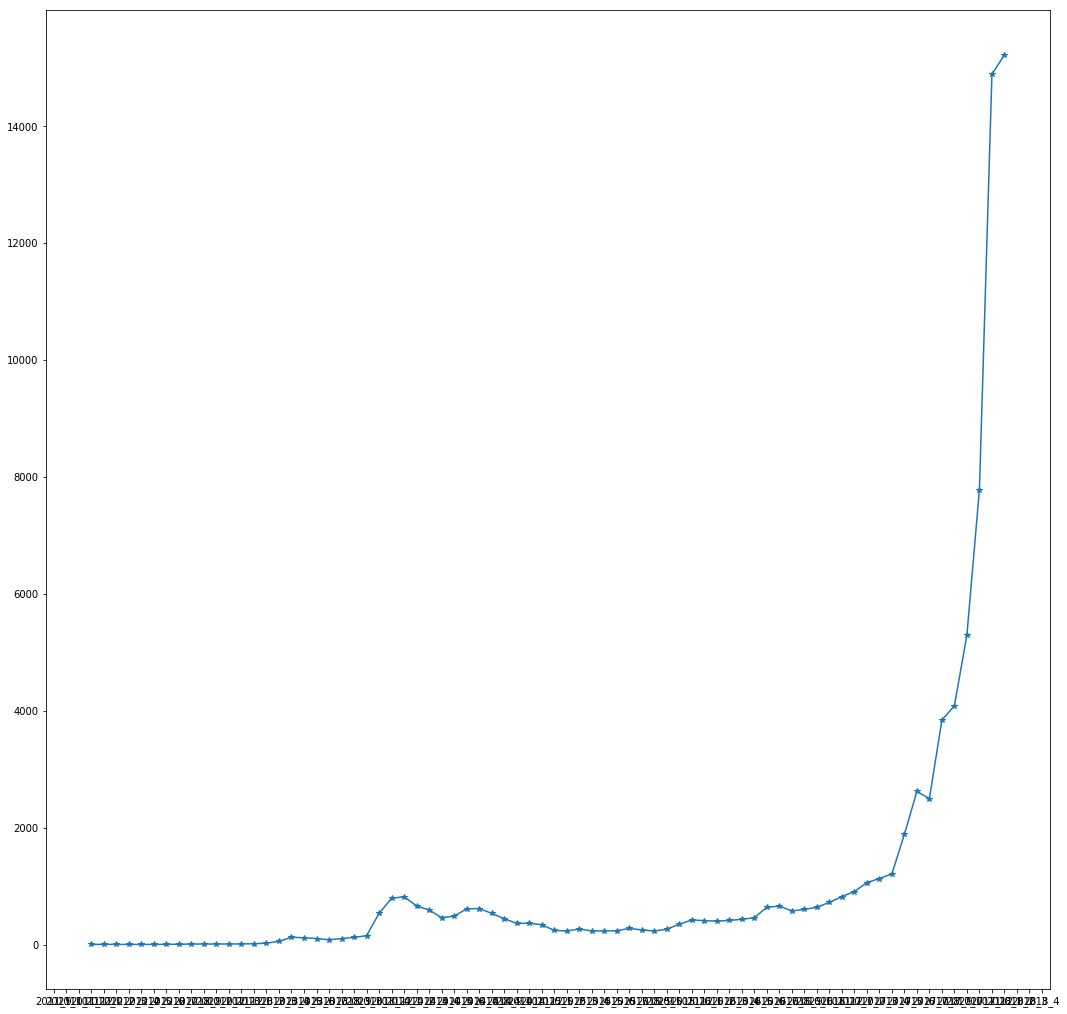

In [36]:
x_ticks = []

for year in years:
    for month in months:
        x_ticks.append(str(year) + "_" + str(month))

        
#x_ticks = np.array(x_ticks)        
fig = plt.figure(figsize=(18, 18))
y = monthly_avg_high
x = list(range(len(x_ticks)))
plt.xticks(x, x_ticks)
plt.plot(x, y, '*-')
plt.show()